<a href="https://colab.research.google.com/github/xwu23-max/QM2-Project/blob/main/Underground_Microbial_Landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#DATA CLEAN
import pandas as pd


def clean_london_metadata(input_file, output_file):

    df = pd.read_csv(input_file)


    target_cities = ['london', 'islington', 'kensington']
    london_df = df[df['city'].isin(target_cities)].copy()


    london_df['line'] = london_df['line'].fillna('Control/Unknown')
    london_df = london_df.rename(columns={'line': 'station_name'})


    london_df['surface_material'] = london_df['surface_material'].fillna('Unknown')
    london_df['surface_material'] = london_df['surface_material'].replace('-', 'Unknown')


    selected_columns = [
        'uuid',
        'city',
        'station_name',
        'latitude',
        'longitude',
        'surface_material',
        'sample_type',
        'num_reads',
        'control_type'
    ]

    london_cleaned = london_df[selected_columns]

    london_cleaned.to_csv(output_file, index=False)
    print(london_cleaned.head())
    print(london_cleaned.info())



if __name__ == "__main__":
    input_csv = 'complete_metadata.csv'
    output_csv = 'london_subway_metadata_cleaned.csv'


    clean_london_metadata(input_csv, output_csv)

                                  uuid       city        station_name  \
2142  haib17CEM5080_H7VL7CCXY_SL267256  islington           morrisons   
2143  haib17CEM5080_H7VL7CCXY_SL267254  islington           morrisons   
2144  haib17CEM5080_H7VL7CCXY_SL267257  islington           town_hall   
2145  haib17CEM5080_H7VL7CCXY_SL267258  islington  freightliners_farm   
2146  haib17CEM5080_H7VL7CCXY_SL267255  islington             trolley   

       latitude  longitude                   surface_material  \
2142  51.557193  -0.116609                            plastic   
2143  51.557206  -0.116587                            plastic   
2144  51.541648  -0.102490                              metal   
2145  51.547553  -0.111448  mixture_of_plastic_metal_and_wood   
2146  51.557134  -0.116626                            plastic   

                   sample_type  num_reads control_type  
2142  environmental_microbiome  2525921.0          NaN  
2143  environmental_microbiome  3040831.0          NaN  

/tmp/ipython-input-1033467304.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_reads', y='station_name', data=station_data[station_data['station_name'].isin(top_stations)],
/tmp/ipython-input-1033467304.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='surface_material', y='num_reads', data=material_data, palette='Set2')


Visualizations generated.


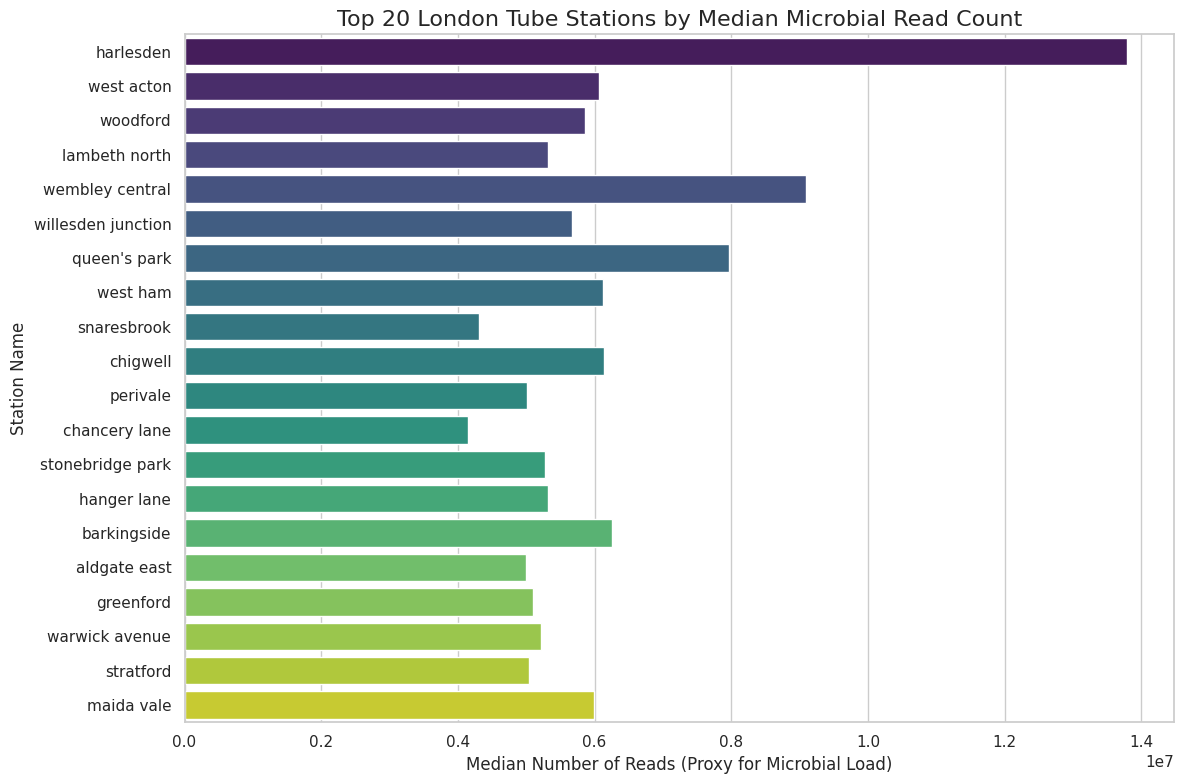

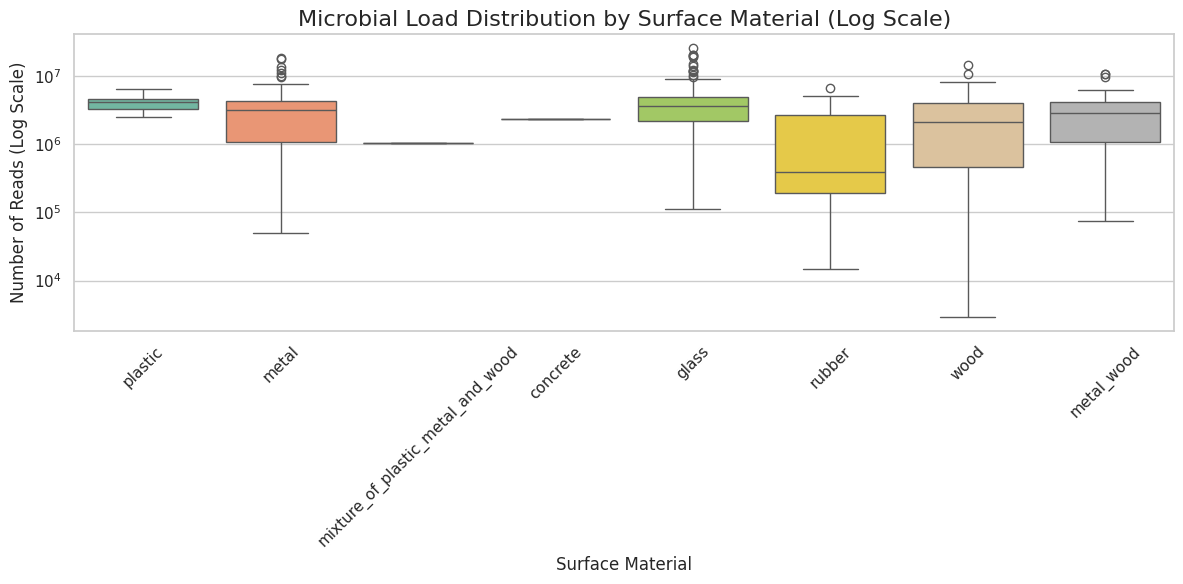

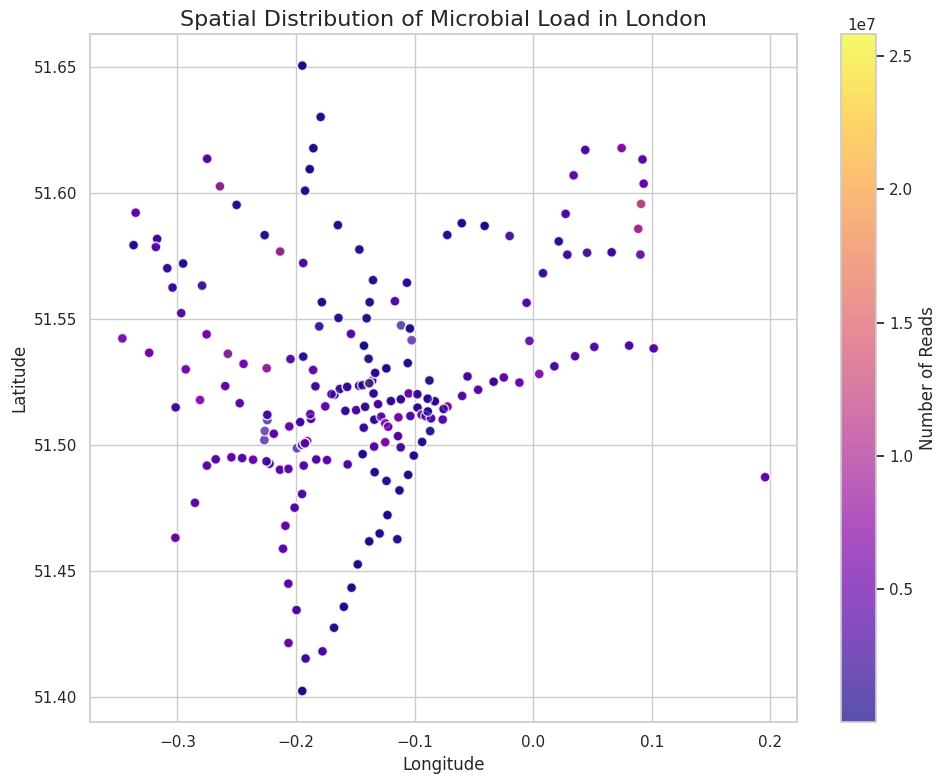

In [2]:
#VISUALISATIONS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Re-load and clean data (to ensure we have the dataframe ready)
df = pd.read_csv('complete_metadata.csv')
target_cities = ['london', 'islington', 'kensington']
london_df = df[df['city'].isin(target_cities)].copy()
london_df['line'] = london_df['line'].fillna('Control/Unknown')
london_df = london_df.rename(columns={'line': 'station_name'})
london_df['surface_material'] = london_df['surface_material'].fillna('Unknown')
london_df['surface_material'] = london_df['surface_material'].replace('-', 'Unknown')
# Convert num_reads to numeric, coerce errors just in case
london_df['num_reads'] = pd.to_numeric(london_df['num_reads'], errors='coerce')

# Filter out controls for the main station analysis to focus on actual stations
station_data = london_df[london_df['station_name'] != 'Control/Unknown'].copy()

# Set up the visualization style
sns.set(style="whitegrid")

# Visualization 1: Top 20 Stations by Median Microbial Load (num_reads)
# Using median is more robust to outliers than mean
top_stations = station_data.groupby('station_name')['num_reads'].median().sort_values(ascending=False).head(20).index
plt.figure(figsize=(12, 8))
sns.barplot(x='num_reads', y='station_name', data=station_data[station_data['station_name'].isin(top_stations)],
            order=top_stations, palette='viridis', errorbar=None)
plt.title('Top 20 London Tube Stations by Median Microbial Read Count', fontsize=16)
plt.xlabel('Median Number of Reads (Proxy for Microbial Load)', fontsize=12)
plt.ylabel('Station Name', fontsize=12)
plt.tight_layout()
plt.savefig('top_20_stations_microbial_load.png')


material_data = london_df[~london_df['surface_material'].isin(['Unknown'])]
plt.figure(figsize=(12, 6))
sns.boxplot(x='surface_material', y='num_reads', data=material_data, palette='Set2')
plt.yscale('log') # Log scale is often better for sequencing data ranges
plt.title('Microbial Load Distribution by Surface Material (Log Scale)', fontsize=16)
plt.xlabel('Surface Material', fontsize=12)
plt.ylabel('Number of Reads (Log Scale)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('microbial_load_by_material.png')


geo_data = london_df.dropna(subset=['latitude', 'longitude', 'num_reads'])
plt.figure(figsize=(10, 8))
sc = plt.scatter(geo_data['longitude'], geo_data['latitude'],
                 c=geo_data['num_reads'], cmap='plasma',
                 alpha=0.7, s=50, edgecolors='w', norm=plt.Normalize(vmin=geo_data['num_reads'].min(), vmax=geo_data['num_reads'].max()))
plt.colorbar(sc, label='Number of Reads')
plt.title('Spatial Distribution of Microbial Load in London', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.savefig('spatial_distribution_london.png')


print("Visualizations generated.")